In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data100 =pd.read_csv('/kaggle/input/mydata-3/C101.csv')
data400 =pd.read_csv('/kaggle/input/mydata-3/C2_4_9.csv')
data600 =pd.read_csv('/kaggle/input/mydata-3/C2_6_6.csv')

# EDA

In [3]:
print("Shape of data100:", data100.shape)
print("Shape of data400:", data400.shape)
print("Shape of data600:", data600.shape)

Shape of data100: (101, 7)
Shape of data400: (402, 7)
Shape of data600: (601, 7)


In [4]:
print("Null values in data100:\n",data100.isnull().sum())
print("Null values in data400:\n",data400.isnull().sum())
print("Null values in data600:\n",data600.isnull().sum())

Null values in data100:
 CUST_NO.        0
XCOORD.         0
YCOORD.         0
DEMAND          0
READY_TIME      0
DUE_DATE        0
SERVICE_TIME    0
dtype: int64
Null values in data400:
 CustomerID     0
X              0
Y              0
Demand         0
ReadyTime      0
DueTime        0
ServiceTime    0
dtype: int64
Null values in data600:
 CUST_NO.        0
XCOORD.         0
YCOORD.         0
DEMAND          0
READY_TIME      0
DUE_DATE        0
SERVICE_TIME    0
dtype: int64


In [5]:
print("Duplications in data100:\n",data100.duplicated().sum())
print("Duplications in data400:\n",data400.duplicated().sum())
print("Duplications in data600:\n",data600.duplicated().sum())

Duplications in data100:
 0
Duplications in data400:
 0
Duplications in data600:
 0


In [6]:
print(data100.columns)
print(data400.columns)
print(data600.columns)

Index(['CUST_NO.', 'XCOORD.', 'YCOORD.', 'DEMAND', 'READY_TIME', 'DUE_DATE',
       'SERVICE_TIME'],
      dtype='object')
Index(['CustomerID', 'X', 'Y', 'Demand', 'ReadyTime', 'DueTime',
       'ServiceTime'],
      dtype='object')
Index(['CUST_NO.', 'XCOORD.', 'YCOORD.', 'DEMAND', 'READY_TIME', 'DUE_DATE',
       'SERVICE_TIME'],
      dtype='object')


In [7]:
print("First few rows of data100:")
print(data100.head())

First few rows of data100:
   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME
0         0       40       50       0           0      1236             0
1         1       45       68      10         912       967            90
2         2       45       70      30         825       870            90
3         3       42       66      10          65       146            90
4         4       42       68      10         727       782            90


In [8]:
data400 = pd.read_csv('/kaggle/input/mydata-3/C2_4_9.csv', header=1)

# Display the first few rows after reloading the data
print("First few rows of data400:")
print(data400.head())

First few rows of data400:
   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME
0         0      100      100       0           0      3693             0
1         1       37       48      10          81       708            90
2         2       42      100      30         461       989            90
3         3      131       31      10        1548      2878            90
4         4      108       13      20        1647      2550            90


In [9]:
print("First few rows of data600:")
print(data600.head())

First few rows of data600:
   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME
0         0      150      150       0           0      3815             0
1         1      248       45      20        1971      2339            90
2         2      227      221      10        1844      2258            90
3         3      122      246      20        2916      3625            90
4         4      165       85      10        2937      3423            90


# Feature Engineering 

In [10]:
# calc the distance from depot (start point) and each customer
from scipy.spatial.distance import cdist

coordinates = data100[['XCOORD.', 'YCOORD.']].values
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, columns=data100['CUST_NO.'], index=data100['CUST_NO.'])
from scipy.spatial.distance import euclidean

#depot is CUST NO. 1
depot_coords = data100.iloc[0][['XCOORD.', 'YCOORD.']].values
data100['Distance_to_Depot'] = data100.apply(lambda row: euclidean(depot_coords, [row['XCOORD.'], row['YCOORD.']]), axis=1)

In [11]:
print(data100.head())

   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME  \
0         0       40       50       0           0      1236             0   
1         1       45       68      10         912       967            90   
2         2       45       70      30         825       870            90   
3         3       42       66      10          65       146            90   
4         4       42       68      10         727       782            90   

   Distance_to_Depot  
0           0.000000  
1          18.681542  
2          20.615528  
3          16.124515  
4          18.110770  


# 100 clustered customers

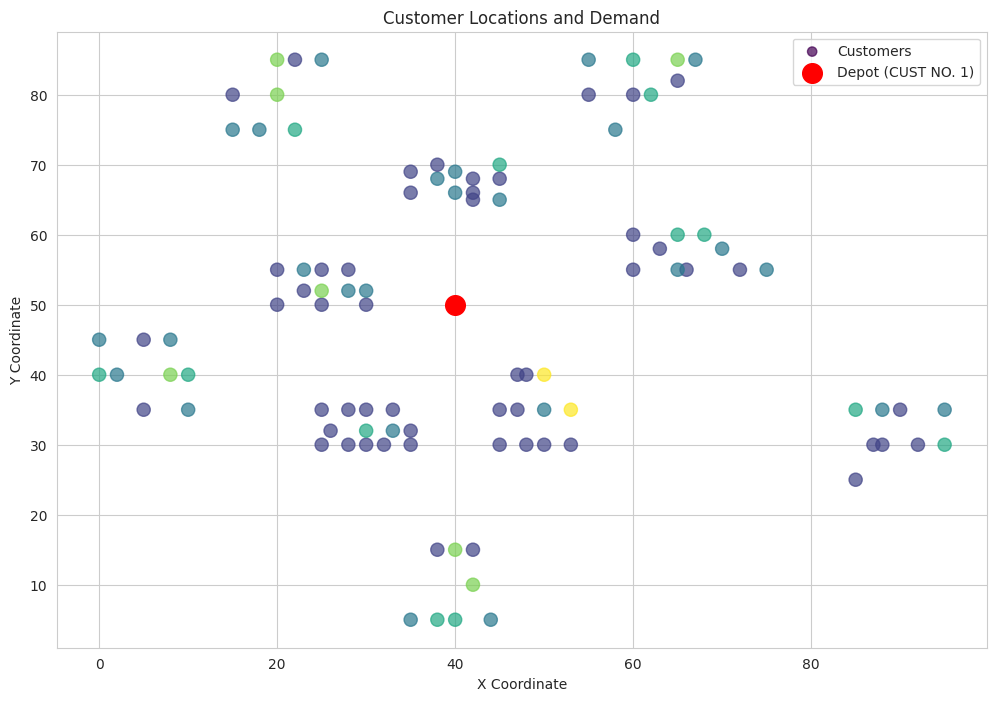

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data100['XCOORD.'], data100['YCOORD.'], 
                    c=data100['DEMAND'], s=data100['SERVICE_TIME'], 
                    cmap='viridis', alpha=0.7)

ax.scatter(data100.iloc[0]['XCOORD.'], data100.iloc[0]['YCOORD.'], 
           c='red', s=200, label='Depot (CUST NO. 1)')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Customer Locations and Demand')
ax.legend(handles=[ax.collections[0], 
                   ax.collections[1]], 
          labels=['Customers', 'Depot (CUST NO. 1)'])

plt.show()

# 400 clustered customers

In [13]:
# calc the distance from depot (start point) and each customer
from scipy.spatial.distance import cdist

coordinates = data400[['XCOORD.', 'YCOORD.']].values
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, columns=data400['CUST_NO.'], index=data400['CUST_NO.'])
from scipy.spatial.distance import euclidean

#depot is CUST NO. 1
depot_coords = data400.iloc[0][['XCOORD.', 'YCOORD.']].values
data400['Distance_to_Depot'] = data400.apply(lambda row: euclidean(depot_coords, [row['XCOORD.'], row['YCOORD.']]), axis=1)

In [14]:
print(data400.head())

   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME  \
0         0      100      100       0           0      3693             0   
1         1       37       48      10          81       708            90   
2         2       42      100      30         461       989            90   
3         3      131       31      10        1548      2878            90   
4         4      108       13      20        1647      2550            90   

   Distance_to_Depot  
0           0.000000  
1          81.688432  
2          58.000000  
3          75.643903  
4          87.367042  


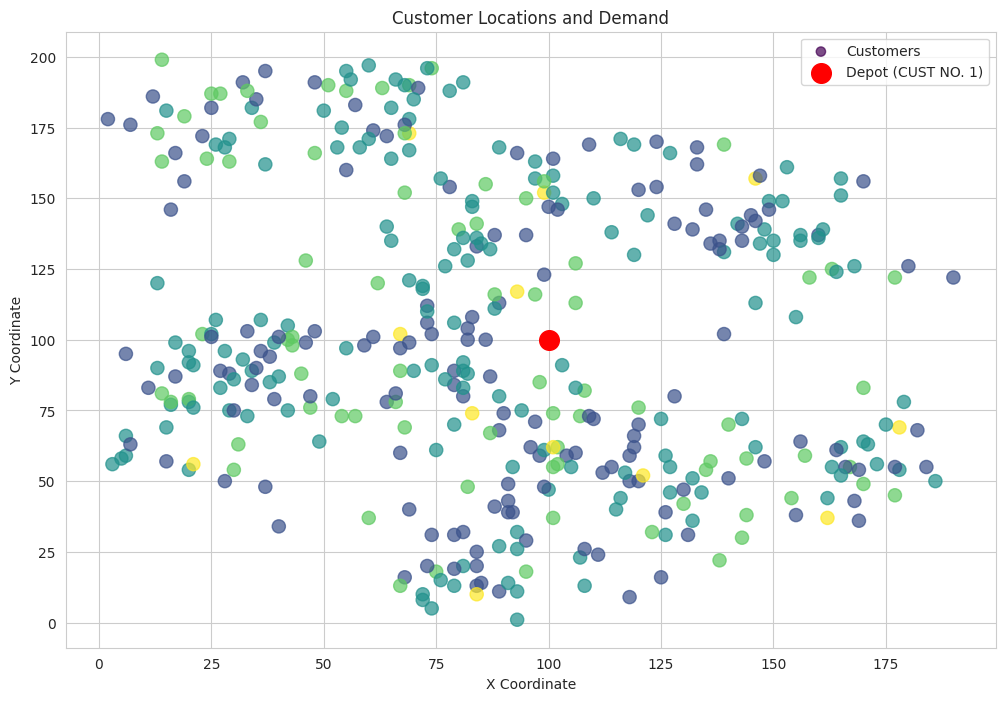

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data400['XCOORD.'], data400['YCOORD.'], 
                    c=data400['DEMAND'], s=data400['SERVICE_TIME'], 
                    cmap='viridis', alpha=0.7)

ax.scatter(data400.iloc[0]['XCOORD.'], data400.iloc[0]['YCOORD.'], 
           c='red', s=200, label='Depot (CUST NO. 1)')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Customer Locations and Demand')
ax.legend(handles=[ax.collections[0], 
                   ax.collections[1]], 
          labels=['Customers', 'Depot (CUST NO. 1)'])

plt.show()

# 600 clustered customers

In [16]:
# calc the distance from depot (start point) and each customer
from scipy.spatial.distance import cdist

coordinates = data600[['XCOORD.', 'YCOORD.']].values
distance_matrix = cdist(coordinates, coordinates, metric='euclidean')
distance_df = pd.DataFrame(distance_matrix, columns=data600['CUST_NO.'], index=data600['CUST_NO.'])
from scipy.spatial.distance import euclidean

#depot is CUST NO. 1
depot_coords = data600.iloc[0][['XCOORD.', 'YCOORD.']].values
data600['Distance_to_Depot'] = data600.apply(lambda row: euclidean(depot_coords, [row['XCOORD.'], row['YCOORD.']]), axis=1)

In [17]:
print(data600.head())

   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME  \
0         0      150      150       0           0      3815             0   
1         1      248       45      20        1971      2339            90   
2         2      227      221      10        1844      2258            90   
3         3      122      246      20        2916      3625            90   
4         4      165       85      10        2937      3423            90   

   Distance_to_Depot  
0           0.000000  
1         143.627992  
2         104.737768  
3         100.000000  
4          66.708320  


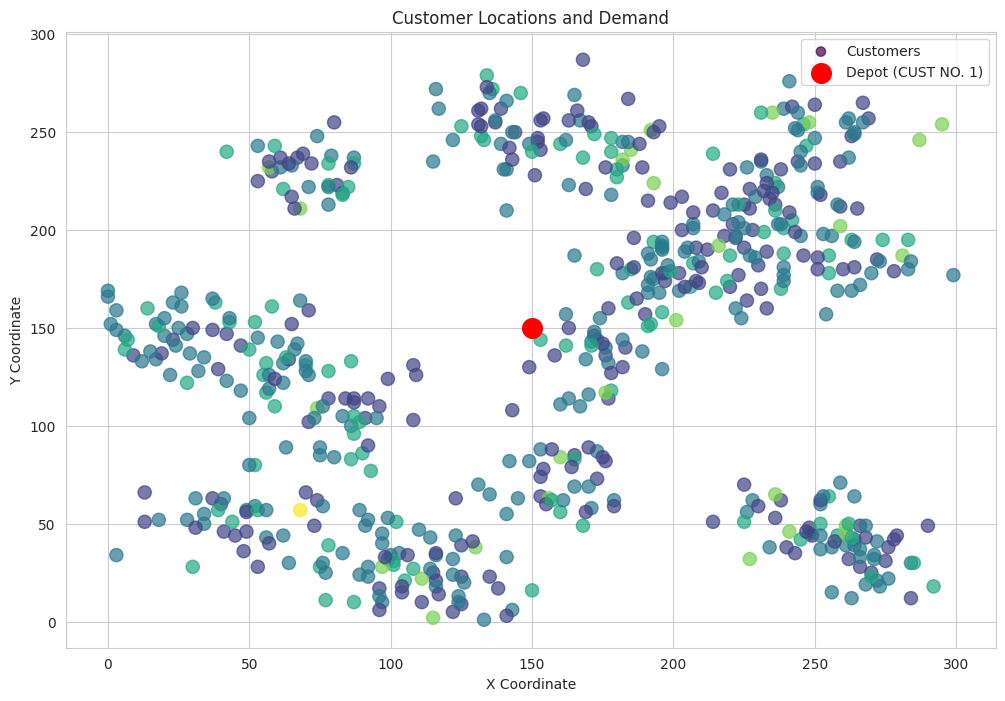

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(data600['XCOORD.'], data600['YCOORD.'], 
                    c=data600['DEMAND'], s=data600['SERVICE_TIME'], 
                    cmap='viridis', alpha=0.7)

ax.scatter(data600.iloc[0]['XCOORD.'], data600.iloc[0]['YCOORD.'], 
           c='red', s=200, label='Depot (CUST NO. 1)')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Customer Locations and Demand')
ax.legend(handles=[ax.collections[0], 
                   ax.collections[1]], 
          labels=['Customers', 'Depot (CUST NO. 1)'])

plt.show()

# K-means Clustering - 100 customers 

In [19]:
data100.columns

Index(['CUST_NO.', 'XCOORD.', 'YCOORD.', 'DEMAND', 'READY_TIME', 'DUE_DATE',
       'SERVICE_TIME', 'Distance_to_Depot'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


First few rows of data100 with cluster labels:
   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME  \
0         0       40       50       0           0      1236             0   
1         1       45       68      10         912       967            90   
2         2       45       70      30         825       870            90   
3         3       42       66      10          65       146            90   
4         4       42       68      10         727       782            90   

   Distance_to_Depot  Cluster  
0           0.000000        4  
1          18.681542        2  
2          20.615528        2  
3          16.124515        2  
4          18.110770        2  


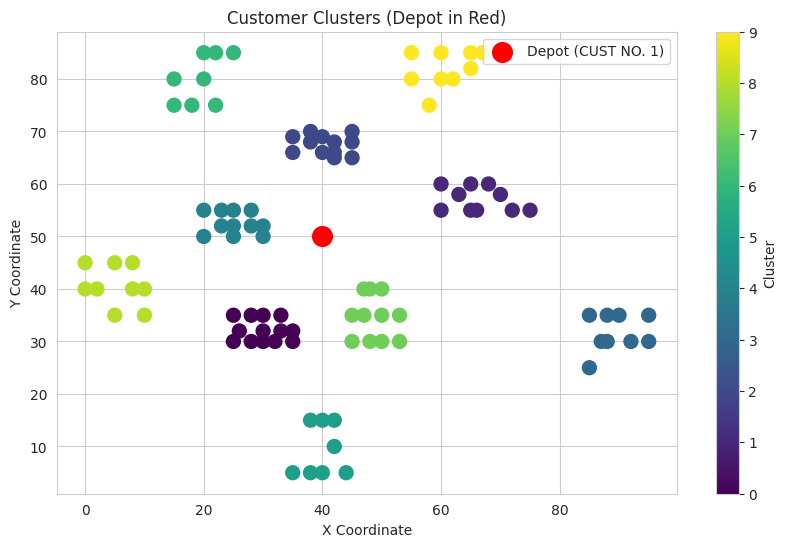

In [36]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# extract the relevant coordinates (X and Y) for clustering
coordinates = data100[['XCOORD.', 'YCOORD.']].values

kmeans = KMeans(n_clusters=10, random_state=42)
data100['Cluster'] = kmeans.fit_predict(coordinates)

print("First few rows of data100 with cluster labels:")
print(data100.head())

plt.figure(figsize=(10, 6))
scatter = plt.scatter(data100['XCOORD.'], data100['YCOORD.'], c=data100['Cluster'], cmap='viridis', marker='o', s=100)
depot_coords = data100.iloc[0] 
plt.scatter(depot_coords['XCOORD.'], depot_coords['YCOORD.'], c='red', s=200, label='Depot (CUST NO. 1)')


plt.colorbar(scatter, label='Cluster')
plt.title('Customer Clusters (Depot in Red)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.legend()
plt.show()

# K-means Clustering - 400 customers 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


First few rows of data400 with cluster labels:
   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME  \
0         0      100      100       0           0      3693             0   
1         1       37       48      10          81       708            90   
2         2       42      100      30         461       989            90   
3         3      131       31      10        1548      2878            90   
4         4      108       13      20        1647      2550            90   

   Distance_to_Depot  Cluster  
0           0.000000       17  
1          81.688432        8  
2          58.000000        1  
3          75.643903       10  
4          87.367042       10  


/tmp/ipykernel_1214/3294971279.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


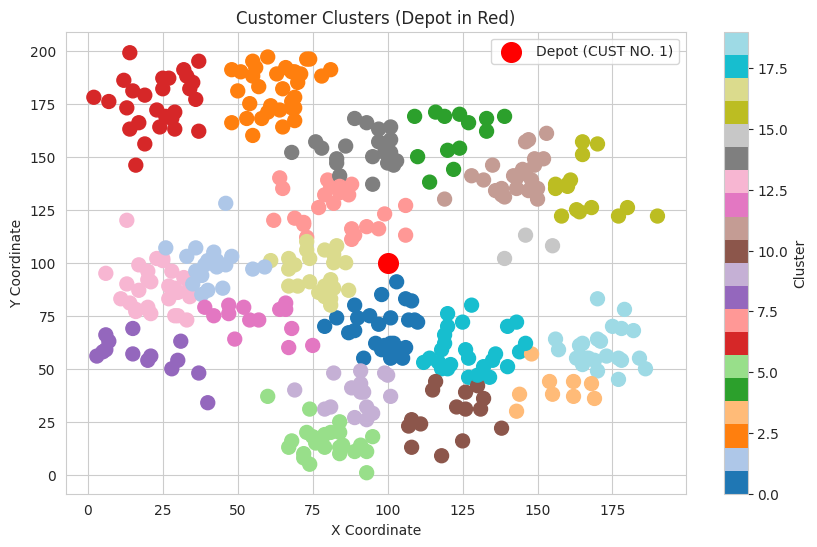

In [37]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

coordinates = data400[['XCOORD.', 'YCOORD.']].values
kmeans = KMeans(n_clusters=20, random_state=42) 
data400['Cluster'] = kmeans.fit_predict(coordinates)

print("First few rows of data400 with cluster labels:")
print(data400.head())


num_clusters = len(np.unique(data400['Cluster'])) 

cmap = cm.get_cmap('tab20', num_clusters)  
fig, ax = plt.subplots(figsize=(10, 6))


scatter = ax.scatter(data400['XCOORD.'], data400['YCOORD.'], c=data400['Cluster'], cmap=cmap, marker='o', s=100)
depot_coords = data400.iloc[0] 

ax.scatter(depot_coords['XCOORD.'], depot_coords['YCOORD.'], c='red', s=200, label='Depot (CUST NO. 1)')
plt.colorbar(scatter, label='Cluster')
plt.title('Customer Clusters (Depot in Red)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

# K-means Clustering - 600 customers 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_1214/1115019263.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


First few rows of data400 with cluster labels:
   CUST_NO.  XCOORD.  YCOORD.  DEMAND  READY_TIME  DUE_DATE  SERVICE_TIME  \
0         0      150      150       0           0      3815             0   
1         1      248       45      20        1971      2339            90   
2         2      227      221      10        1844      2258            90   
3         3      122      246      20        2916      3625            90   
4         4      165       85      10        2937      3423            90   

   Distance_to_Depot  Cluster  
0           0.000000       17  
1         143.627992        2  
2         104.737768        6  
3         100.000000        4  
4          66.708320        7  


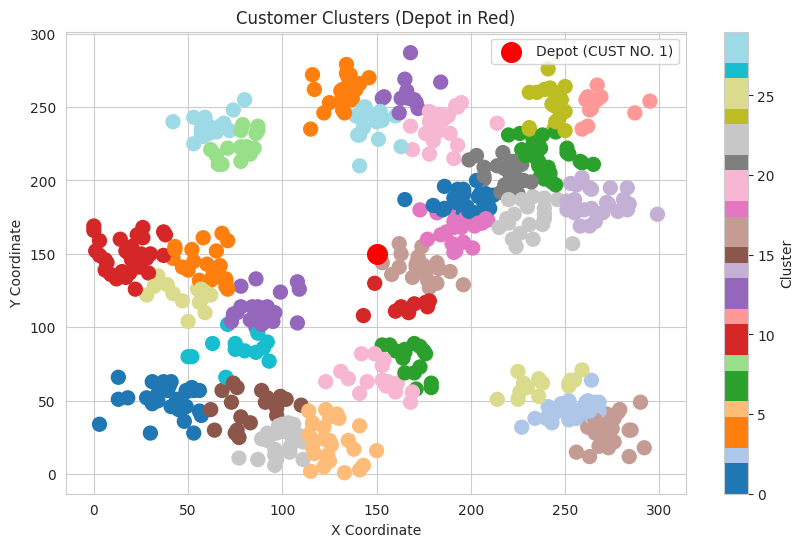

In [38]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

coordinates = data600[['XCOORD.', 'YCOORD.']].values
kmeans = KMeans(n_clusters=30, random_state=42) 
data600['Cluster'] = kmeans.fit_predict(coordinates)

print("First few rows of data400 with cluster labels:")
print(data600.head())

num_clusters = len(np.unique(data600['Cluster'])) 
cmap = cm.get_cmap('tab20', num_clusters)  
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data600['XCOORD.'], data600['YCOORD.'], c=data600['Cluster'], cmap=cmap, marker='o', s=100)

depot_coords = data600.iloc[0]
plt.scatter(depot_coords['XCOORD.'], depot_coords['YCOORD.'], c='red', s=200, label='Depot (CUST NO. 1)')

plt.colorbar(scatter, label='Cluster')
plt.title('Customer Clusters (Depot in Red)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()